In [1]:
import numpy as np
import matplotlib.pyplot as plt


# What I want this to do - give me a delta wavelength and a delta power
def simple_laser(i_drive_ac, v_drive=1.5, wpe=0.15, rjc=45):
    delta_ele_power = v_drive*i_drive_ac*(1-wpe)
    delta_opt_power = v_drive*i_drive_ac*wpe
    delta_T = delta_ele_power*rjc
    delta_lambda = delta_T*0.1e-9 # nm/C
    return delta_lambda, delta_ele_power, delta_opt_power

def simple_mux(center_wavelength, laser_wavelength, laser_power, delta_wavelength, delta_opt_power, bw=0.1e-9, ildb=-3):
   il_mag = 10**(ildb/10)
   noise_floor = 10**(-40/10)
   #self.il_mag*np.exp(-((self.lambda_sweep-target_grid_array[i])/bw_lambda)**2/4.343)
   il_at_lambda = il_mag*np.exp(-((center_wavelength-laser_wavelength)/bw)**2/4.343)
   il_at_lambda[il_at_lambda < noise_floor] = noise_floor
   il_plus = il_at_lambda*np.exp(-((center_wavelength-(laser_wavelength+delta_wavelength))/bw)**2/4.343)
   il_plus[il_plus < noise_floor] = noise_floor
   il_minus = il_at_lambda*np.exp(-((center_wavelength-(laser_wavelength-delta_wavelength))/bw)**2/4.343)
   il_minus[il_minus < noise_floor] = noise_floor
   pout = laser_power*il_at_lambda
   pout_plus = (laser_power + delta_opt_power)*il_plus
   pout_minus = (laser_power - delta_opt_power)*il_minus
   return pout, pout_plus, pout_minus
  

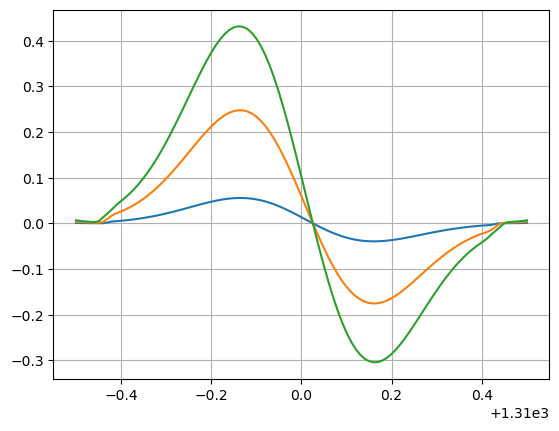

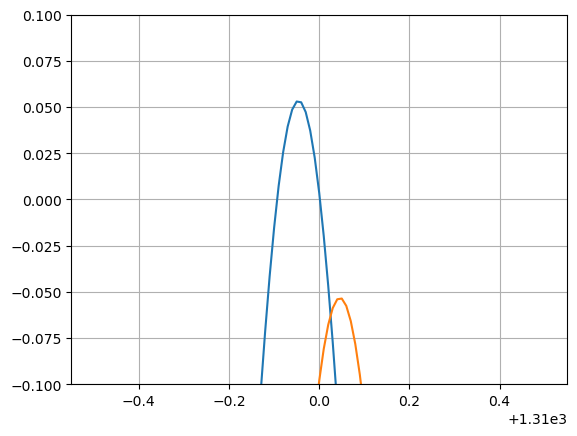

In [2]:
center_wavelength = 1310e-9
laser_wavelength = np.linspace(1309.5e-9, 1310.5e-9, 101)
wpe = 0.15
laser_power = 1.5*150e-3*wpe
i_drive_ac_sweep = np.linspace(1e-3, 8e-3, 3)
fig, ax = plt.subplots()
for i_drive_ac in i_drive_ac_sweep:
    delta_wavelength_plus, delta_ele_power_plus, delta_opt_power_plus = simple_laser(i_drive_ac, wpe=wpe)
    delta_wavelength_minus, delta_ele_power_minus, delta_opt_power_minus = simple_laser(i_drive_ac, wpe=wpe)
    pout, pout_plus, _ = simple_mux(center_wavelength, laser_wavelength, laser_power, delta_wavelength_plus, delta_opt_power_plus)
    pout, _, pout_minus = simple_mux(center_wavelength, laser_wavelength, laser_power, delta_wavelength_minus, delta_opt_power_minus)
    #Plot
    
    ax.plot(laser_wavelength*1e9, (pout_plus-pout_minus)/(pout))
ax.grid()

plt.figure()
plt.plot(laser_wavelength*1e9, (pout_plus-pout)/pout)
plt.plot(laser_wavelength*1e9, (pout_minus-pout)/pout)
plt.ylim(-0.1,0.1)
plt.grid(True)
